# Scraping Top Movies from IMDB Through AJAX Call Using Python

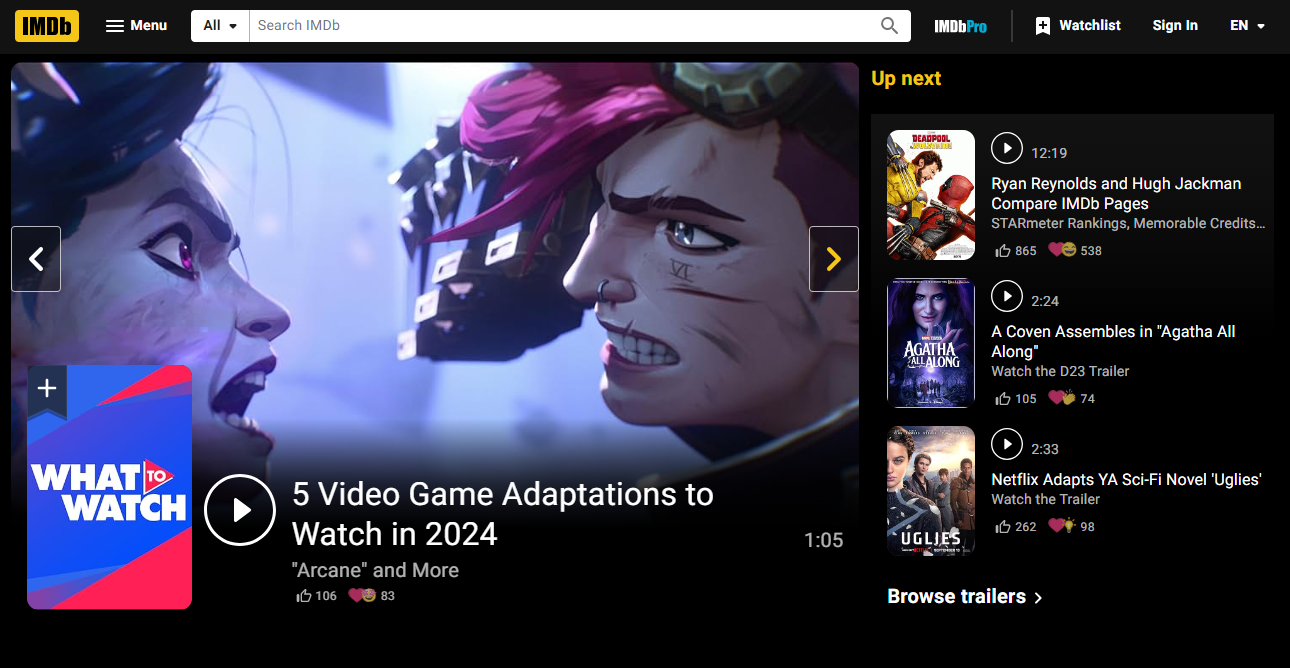

Web Scraping is useful to extract meaningful data from a Website. Many sites load additional data by running a script after the browser elements have been loaded. Using Selenium or other browser based modules would allow us to access such data however it would be highly ineffecient. Identifying an AJAX call can save time and memory and is thus the approach for this project. 

Following libraries from Python are used in this project:
- requests
- BeautifulSoup
- csv
- json
- pandas

## Problem 
IMDB is an online database for movies, TV shows, streaming content, and much more. It allows the community to interact with the movie description, rate them, rank them, select their genre, and so on.
This project would scrape the top 250 movies from the website and store the data in a csv file with following details:
- Movie Name
- Release Year
- Duration
- Certificate Rating (PG/R etc.)
- Movie Genres
- Rating
- Number of Votes
  
The current IMDB website however runs a javascript to load the data for movies after top 25 movies. A basic approach using "requests" library and html tagging would result in fetching only 25 movies. For this reason this project will use AJAX (Asynchronous JavaScript And XML) Method.  

## Workflow
* Get the webpage from URL using requests and convert it into a bs4 object.
* Find the script using BeautifulSoup and load the json data into a python object.
* Get the movie data and write it to a CSV file.
* View the data using pandas library.

### Downloading Webpage
To download the webpage we first define the URL and user-agent for the page and pass those to requests to get a response object which is converted to the soup object using BeautifulSoup. Since the site uses javascript for dynamic data we utilize the script from page source.

In [14]:
from bs4 import BeautifulSoup
import requests, json, csv

In [15]:
url = "https://www.imdb.com/chart/top/?&genres="
header = {
    "User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36"
}

### Finding Script and Loading JSON
After locating the data through the page source, the data was found to be stored in a script tag. BeautifulSoup was used to find this element and the json was converted to python object using json.loads() from json library.


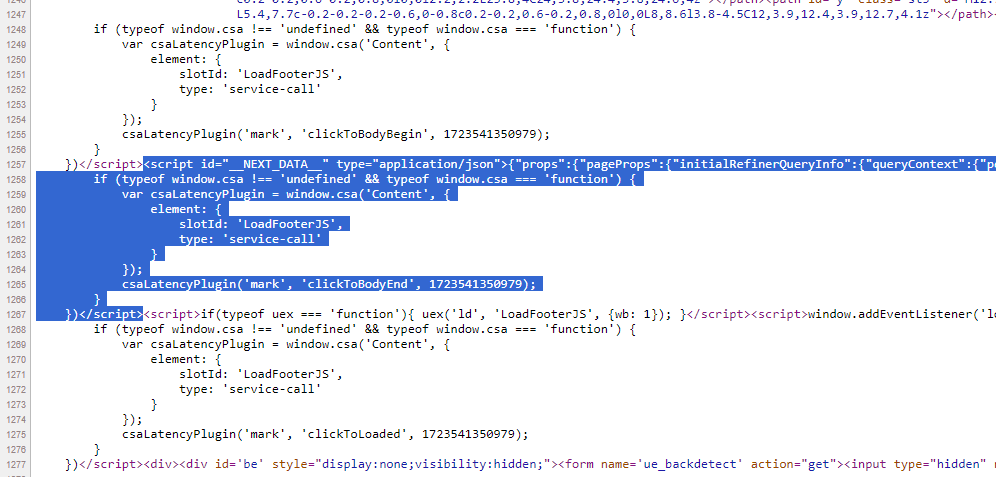

In [16]:
def scrape():
    try:
        res = requests.get(url,headers=header)
        res.raise_for_status()
        soup = BeautifulSoup(res.text,'lxml')

        data = json.loads(soup.find('script', {'id' : "__NEXT_DATA__"}, type='application/json').text)
        mainData = maindata(data['props']['pageProps']['pageData']['chartTitles']['edges'])
        
        toCSV(mainData)
        
    except Exception as e:
        print(e)

The function scrape() does the following:
- Gets the webpage using requests.
- Generate a BeautifulSoup object.
- Converts json data from script into python object.
- Calls toCSV() to write scraped data to a CSV file.

### Storing Data in List of Lists
JSON data is accessed and passed to function maindata() which accesses the required data i.e. Movie Name, Release Year, Duration, Certificate, Genres, Rating, and Votes, and then appends them as a sublist to a list md and then returns it.

In [17]:
def maindata(data):
    md = []
    for i in range (0,250):
        var = data[i]['node']
        movie_name = var['titleText']['text']
        releaseYear = var['releaseYear']['year']
        duration = round(var['runtime']['seconds']/3600,2)
        rating = var['ratingsSummary']['aggregateRating']
        votes = var['ratingsSummary']['voteCount']
        certificate = getcert(var['certificate'])
        genres = getgenres(var['titleGenres']['genres'])
        md.append([movie_name,releaseYear,duration,certificate,genres,rating,votes])
    return md

### Functions for Handling Errors
The function getgenres() unpacks the list of genres and return as a single string of genres seperated by comma while the function getcert() prevents errors for the movies for which certification is not present in json file. 

In [18]:
def getgenres(var):
    genres = var[0]['genre']['text']
    for j in range(1,len(var)):
        genres += ", " + var[j]['genre']['text']
    return genres

In [19]:
def getcert(var):
    if var == None:
        return 'Not Rated'
    else:
        return var['rating']

### Writing to CSV File
The list data is then passed to toCSV() function where the CSV writer from CSV library writes the data to a CSV file which is then viewd using the pandas library 

In [20]:
def toCSV(final_data):
    header = ['Movie','Release Year','Duration(Hrs)','Certificate','Genres','Rating','Votes']
    with open('Top IMDB Movies.csv','w', newline='', encoding='UTF8') as fl:
        writer = csv.writer(fl)
        writer.writerow(header)
        writer.writerows(final_data)
    print("File made!!!")

In [21]:
if __name__ == '__main__':
    scrape()

File made!!!


### Viewing the CSV File
The top 5 movies are viewed from the CSV file using the read_csv() function from pandas library.

In [22]:
from pandas import read_csv 

In [23]:
read_csv('Top IMDB Movies.csv',nrows = 5)

,Movie,Release Year,Duration(Hrs),Certificate,Genres,Rating,Votes
0,The Shawshank Redemption,1994,2.37,A,Drama,9.3,2927048
1,The Godfather,1972,2.92,A,"Crime, Drama",9.2,2039866
2,The Dark Knight,2008,2.53,UA,"Action, Crime, Drama",9.0,2907692
3,The Godfather: Part II,1974,3.37,A,"Crime, Drama",9.0,1379739
4,12 Angry Men,1957,1.60,U,"Crime, Drama",9.0,878465
